In [214]:
using DataFrames

include("src/spectrum.jl")
include("src/modesolutions.jl")
include("src/shgintegration.jl")
include("src/shg.jl")
include("src/basic.jl")

query (generic function with 1 method)

## 配置参数范围，扫描给定波长范围的基频模式

In [184]:
lambda = [1580, 1600] # 扫谱波长范围 nm
mode = "TE" # 电磁场模式
R = 24 # WGM 半径
n = 2.2 # 折射率
d = [2.1, -4.3, -27] # 非线性张量 d = [d22, d31, d33]
n_num_max = 2 # 扫描最大径向阶数

# 扫谱
data_f = spectrum(lambda, mode, n_num_max, n, R, Q_factor="open", option="n_num depend");

### 基频模式存入文件

In [69]:
# 扫谱结果存入文件
path_f = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda'nm' n_max=$n_num_max mode=$mode.csv"
CSV.write(path_f, data_f)

"/Users/wenzhengliu/Research/temp_data/radius=24 refractive_id=2.2 wavelength=[1580, 1600]'nm' n_max=2 mode=TE.csv"

## 配置参数范围，扫描给定波长范围的倍频模式

In [70]:
lambda_shg = lambda/2 # 倍频光扫谱波长范围 nm
data_shg = spectrum(lambda_shg, mode, n_num_max, n, R, Q_factor="open", option="n_num depend");

Finished ✓      100%|███████████████████████████████████| Time: 0:00:34


### 倍频模式存入文件

In [71]:
# 扫谱结果存入文件
path_shg = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_shg'nm' n_max=$n_num_max mode=$mode.csv"
CSV.write(path_shg, data_shg)

"/Users/wenzhengliu/Research/temp_data/radius=24 refractive_id=2.2 wavelength=[790.0, 800.0]'nm' n_max=2 mode=TE.csv"

## 光谱图

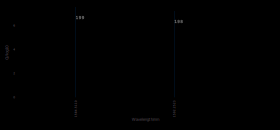

In [119]:
# 显示谱线结果
view_spectrum(lambda, data_f, 1, view_mode="details")

## 选定某一模式，绘制场分布图

In [206]:
# 作图，给定模式数
n_num, l_num, m_num = 1, 199, 199
# println(query(n_num, l_num, option=data_shg))

(1, 199, 199)

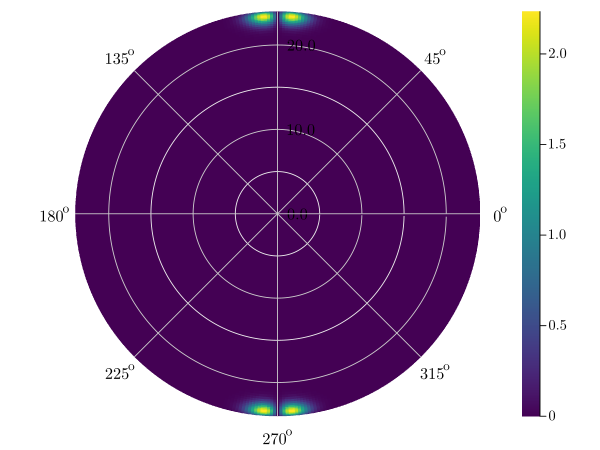

In [212]:
n_num, l_num, m_num = 1, 199, 199
view_field(data_f, n_num, l_num, m_num, n, R, mode, "nE_phi", quality="coarse", scale="normal")

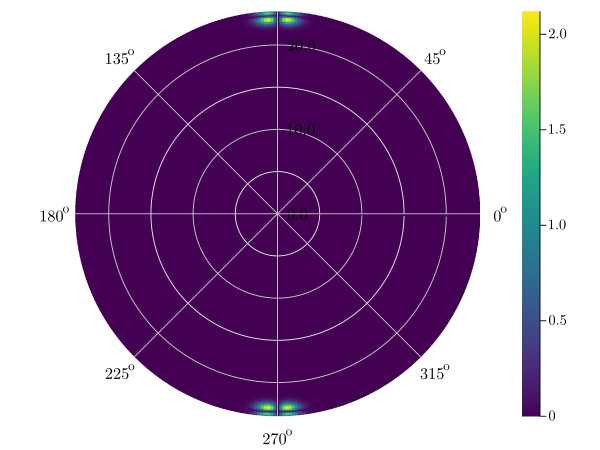

In [213]:
n_num, l_num, m_num = 2, 395, 395

view_field(data_shg, n_num, l_num, m_num, n, R, mode, "nE_phi", quality="coarse", scale="normal")

In [74]:
#=
lambda = [1580, 1600] # 扫谱波长范围 nm
lambda_shg = lambda/2

mode = "TE" # 电磁场模式
R = 25 # WGM 半径
n = 1.5 # 折射率
n_num_max = 2 # 径向阶数
=#

data_f = CSV.File(path_f)
data_f = sort!(DataFrame(data_f), :wavelength);

data_shg = CSV.File(path_shg)
data_shg = sort!(DataFrame(data_shg), :wavelength);

In [77]:
detune = detuning(data_f, data_shg)

,ratio_g,n_f,l_f,mode_f,wavelength_f,Q_f,n_shg,l_shg,mode_shg
,Float64,Int64,Int64,String,Float64,Float64,Int64,Int64,String
1,2.51288e-8,2,190,TE,1590.77,7.50792,1,404,TE
2,1.41931e-8,2,189,TE,1598.68,7.51952,1,402,TE
3,1.14937e-8,2,191,TE,1582.93,7.19542,1,406,TE
4,4.70368e-9,1,199,TE,1584.51,7.54015,2,395,TE
5,4.41445e-9,1,198,TE,1592.25,7.20907,2,393,TE
6,2.03045e-9,2,191,TE,1582.93,7.19542,2,396,TE
7,1.6732e-9,1,198,TE,1592.25,7.20907,1,403,TE
8,1.60663e-9,1,199,TE,1584.51,7.54015,1,405,TE
9,1.53348e-9,1,198,TE,1592.25,7.20907,1,404,TE


In [128]:
#=
n_num1 = 1
l_num1 = 199
m_num1 = 199
lambda1 = query(n_num1, l_num1, option=data_f)
mode1 = "TE"
field_type1 = "E"

n_num2 = 2 
l_num2 = 395
m_num2 = 395
lambda2 = query(n_num2, l_num2, option=data_shg)
mode2 = "TE"
field_type2 = "E"

field_parameters = [[lambda1, l_num1, m_num1, mode1, field_type1], [lambda1, l_num1, m_num1, mode1, field_type1]]
overlap_field(field_parameters, n, R, digit=3)

integral_region(lambda1,l_num1, m_num1, n, R, mode1, "E"; error=1e-2)

field_parameters_nonlinearity = [[lambda1, l_num1, m_num1, mode1], [lambda2, l_num2, m_num2, mode2]]
overlap_nonlinearity(field_parameters_nonlinearity, n, R, d; digit=2)
=#

"E"

In [215]:
g = overlap_array(detune, n, R, d, [1, 1], 5)
show(g, allcols=true)

Finished ✓      100%[==================================================] Time: 0:00:11


gnl = 2.9563860382949382e7


Finished ✓      100%[==================================================] Time: 0:00:10


gnl = 2.9599922420896865e7
2×15 DataFrame
 Row │ g                g_total         ratio_g     n_f    l_f    m_f    mode_f  wavelength_f  Q_f      n_shg  l_shg  m_shg  mode_shg  wavelength_shg  Q_shg   
     │ Complex…         Complex…        Float64     Int64  Int64  Int64  String  Float64       Float64  Int64  Int64  Int64  String    Float64         Float64 
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2.95639e7+0.0im  0.139059+0.0im  4.70368e-9      1    199    199  TE           1584.51  7.54015      2    395    395  TE               792.536  7.61399
   2 │ 2.95999e7+0.0im  0.130667+0.0im  4.41445e-9      1    198    198  TE           1592.25  7.20907      2    393    393  TE               796.417  7.61493